In [1]:
import mxnet as mx
import gluoncv as gcv
from IPython.display import Image
import matplotlib.pyplot as plt

In [2]:
image_url = 'https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/classification/mt_baker.jpg'
image_filepath = 'mt_baker.jpg'
gcv.utils.download(image_url, image_filepath)

'mt_baker.jpg'

In [3]:
!wget 'https://cv.gluon.ai/_downloads/5966af3c5a6133b4f80f4892e25fb82e/demo_imagenet.py'

--2020-10-29 13:46:20--  https://cv.gluon.ai/_downloads/5966af3c5a6133b4f80f4892e25fb82e/demo_imagenet.py
Resolving cv.gluon.ai (cv.gluon.ai)... 65.8.134.17, 65.8.134.113, 65.8.134.124, ...
Connecting to cv.gluon.ai (cv.gluon.ai)|65.8.134.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1362 (1.3K) [text/x-python]
Saving to: ‘demo_imagenet.py.2’

demo_imagenet.py.2  100%[===================>]   1.33K  --.-KB/s    in 0s      

2020-10-29 13:46:20 (155 MB/s) - ‘demo_imagenet.py.2’ saved [1362/1362]



In [4]:
!python demo_imagenet.py --model resnet50_v1d --input-pic mt_baker.jpg

[13:46:22] ../src/storage/storage.cc:198: Using Pooled (Naive) StorageManager for CPU
The input picture is classified to be
	[volcano], with probability 0.832.
	[alp], with probability 0.051.
	[valley], with probability 0.006.
	[mountain tent], with probability 0.005.
	[lakeside], with probability 0.005.


In [5]:
image = mx.image.imread('mt_baker.jpg')
print(type(image))
print(image.shape)

<class 'mxnet.ndarray.ndarray.NDArray'>
(1458, 3000, 3)


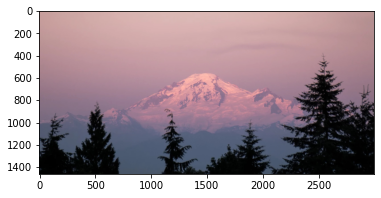

In [6]:
plt.imshow(image.asnumpy())

In [7]:
image = gcv.data.transforms.presets.imagenet.transform_eval(image)
print(type(image))
print(image.shape)
print(image.dtype)
print(image.min().asscalar())
print(image.max().asscalar())

<class 'mxnet.ndarray.ndarray.NDArray'>
(1, 3, 224, 224)
<class 'numpy.float32'>
-2.117904
2.2489083


In [8]:
network = gcv.model_zoo.get_model('ResNet50_v1d', pretrained=True)

In [9]:
prediction = network(image)
prediction = prediction[0]
prediction.shape

(1000,)

In [10]:
probability = mx.nd.softmax(prediction)

In [11]:
probability[950:]


[3.27333342e-04 9.27350702e-05 1.51370899e-04 8.98624494e-05
 1.10506146e-04 4.76043097e-05 9.21246465e-05 1.23743186e-04
 2.67772353e-04 8.33243321e-05 1.72787928e-04 1.55298170e-04
 7.60726325e-05 7.03603801e-05 8.46288312e-05 8.18544868e-05
 1.13722526e-04 8.34134553e-05 1.27692416e-04 8.79833606e-05
 5.05503602e-02 2.57108273e-04 4.55157395e-04 5.68645446e-05
 3.72288050e-04 4.95625334e-03 5.74082078e-04 2.20315633e-04
 6.72618102e-04 6.24027289e-03 8.32254708e-01 4.73914115e-05
 3.36577577e-05 3.80481251e-05 1.63591860e-04 1.34064336e-04
 1.21245794e-04 7.00410965e-05 1.05739549e-04 1.03115286e-04
 1.27995751e-04 1.08201151e-04 1.04122650e-04 1.89362923e-04
 2.25224736e-04 1.57678034e-04 4.16816983e-05 1.27945474e-04
 1.30661356e-04 1.39481999e-04]
<NDArray 50 @cpu(0)>

In [12]:
max(list(probability))


[0.8322547]
<NDArray 1 @cpu(0)>

In [25]:
k = 5
topk_indices = mx.nd.topk(probability, k=k)
topk_indices


[980. 970. 979. 672. 975.]
<NDArray 5 @cpu(0)>

In [26]:
for i in range(k):
    class_index = topk_indices[i].astype('int').asscalar()
    class_label = network.classes[class_index]
    print(class_label)

volcano
alp
valley
mountain tent
lakeside
